In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/logs/validation_full_log_agent302.csv"
# csv_path = r"C:\Users\frodi\Documents\OptimisedHeating\validation\validation_full_log_agent103.csv"
agent_results_df = pd.read_csv(csv_path)

In [24]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,ActionIndex,DemandScale,Reward,EffReward,Valid heads ratio,Energy reward,Q_0,Q_1,Q_2,Q_3,...,Demand_17,Demand_18,PumpGroupSpeed_1,PumpGroupSpeed_2,PumpGroupSpeed_3,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,1052,1.0,1.566166,1.297631,0.975793,-0.649456,0.809600,0.917607,0.912842,0.871583,...,0.0,0.0,0.95,0.95,0.86,22.505690,22.478824,7.332906,7.336909,8.709512
1,1052,0.8,1.567826,1.156491,0.984400,-0.529824,0.800606,0.909851,0.904256,0.863989,...,0.0,0.0,0.95,0.95,0.86,19.106424,19.086710,5.161422,5.164439,7.251921
2,1052,0.9,1.584167,1.245064,0.980097,-0.590413,0.841402,0.950416,0.937007,0.917585,...,0.0,0.0,0.95,0.95,0.86,20.785593,20.762475,6.294859,6.298404,8.007370
3,1052,1.0,1.566166,1.297631,0.975793,-0.649456,0.840954,0.940520,0.942685,0.898545,...,0.0,0.0,0.95,0.95,0.86,22.505690,22.478824,7.332906,7.336909,8.709512
4,1052,1.1,1.513599,1.313869,0.971490,-0.706860,0.800606,0.909851,0.904256,0.863989,...,0.0,0.0,0.95,0.95,0.86,24.242168,24.211260,8.298043,8.302446,9.352424


In [25]:
df_tranposed = agent_results_df.T
df_tranposed.to_excel('agent_results_transposed.xlsx', index=True)

In [26]:
for name in agent_results_df.columns:
    print(name)

ActionIndex
DemandScale
Reward
EffReward
Valid heads ratio
Energy reward
Q_0
Q_1
Q_2
Q_3
Q_4
Q_5
Q_6
Q_7
Q_8
Q_9
Q_10
Q_11
Q_12
Q_13
Q_14
Q_15
Q_16
Q_17
Q_18
Q_19
Q_20
Q_21
Q_22
Q_23
Q_24
Q_25
Q_26
Q_27
Q_28
Q_29
Q_30
Q_31
Q_32
Q_33
Q_34
Q_35
Q_36
Q_37
Q_38
Q_39
Q_40
Q_41
Q_42
Q_43
Q_44
Q_45
Q_46
Q_47
Q_48
Q_49
Q_50
Q_51
Q_52
Q_53
Q_54
Q_55
Q_56
Q_57
Q_58
Q_59
Q_60
Q_61
Q_62
Q_63
Q_64
Q_65
Q_66
Q_67
Q_68
Q_69
Q_70
Q_71
Q_72
Q_73
Q_74
Q_75
Q_76
Q_77
Q_78
Q_79
Q_80
Q_81
Q_82
Q_83
Q_84
Q_85
Q_86
Q_87
Q_88
Q_89
Q_90
Q_91
Q_92
Q_93
Q_94
Q_95
Q_96
Q_97
Q_98
Q_99
Q_100
Q_101
Q_102
Q_103
Q_104
Q_105
Q_106
Q_107
Q_108
Q_109
Q_110
Q_111
Q_112
Q_113
Q_114
Q_115
Q_116
Q_117
Q_118
Q_119
Q_120
Q_121
Q_122
Q_123
Q_124
Q_125
Q_126
Q_127
Q_128
Q_129
Q_130
Q_131
Q_132
Q_133
Q_134
Q_135
Q_136
Q_137
Q_138
Q_139
Q_140
Q_141
Q_142
Q_143
Q_144
Q_145
Q_146
Q_147
Q_148
Q_149
Q_150
Q_151
Q_152
Q_153
Q_154
Q_155
Q_156
Q_157
Q_158
Q_159
Q_160
Q_161
Q_162
Q_163
Q_164
Q_165
Q_166
Q_167
Q_168
Q_169
Q_170
Q_171
Q_172

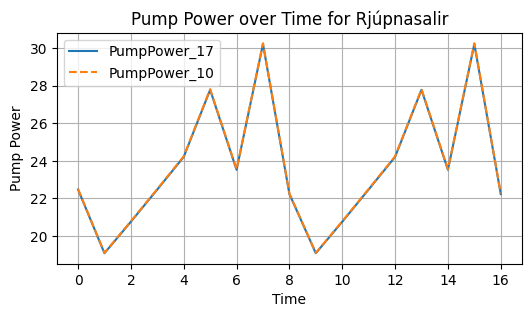

In [27]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


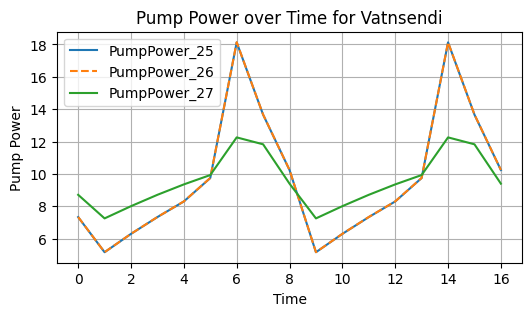

In [28]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)
# plt.ylim(8,19)

# Display the legend
plt.legend()

# Show the plot
plt.show()


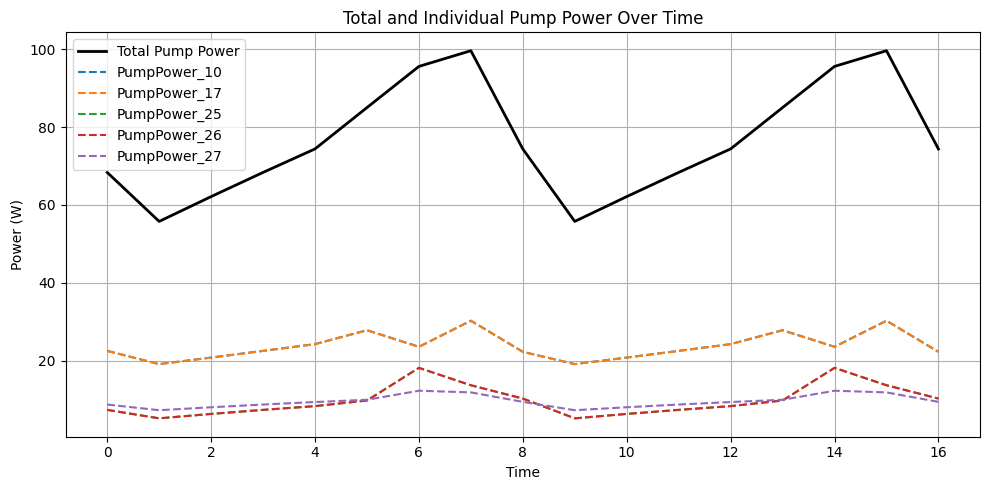

In [29]:
import matplotlib.pyplot as plt

# List of relevant pump power column names
pump_power_columns = ['PumpPower_10', 'PumpPower_17', 'PumpPower_25', 'PumpPower_26', 'PumpPower_27']

# Calculate total pump power at each index
agent_results_df['TotalPumpPower'] = agent_results_df[pump_power_columns].sum(axis=1)

# Plot the total pump power
plt.figure(figsize=(10, 5))
plt.plot(agent_results_df.index, agent_results_df['TotalPumpPower'], label='Total Pump Power', color='black', linewidth=2)

# Optionally plot individual pump powers too
for col in pump_power_columns:
    plt.plot(agent_results_df.index, agent_results_df[col], label=col, linestyle='--')

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Total and Individual Pump Power Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
agent_results_df['TotalPumpPower']

Step
0     68.363841
1     55.770916
2     62.148701
3     68.363841
4     74.406341
5     85.027535
6     95.605580
7     99.640960
8     74.378125
9     55.770916
10    62.148701
11    68.363841
12    74.406341
13    85.027535
14    95.605580
15    99.640960
16    74.378125
Name: TotalPumpPower, dtype: float64

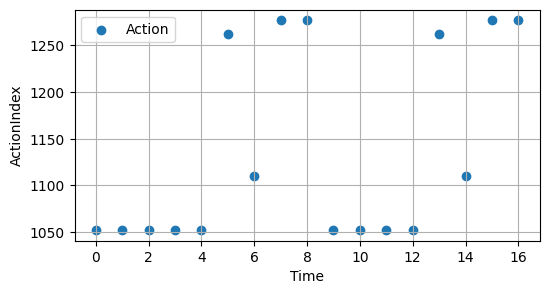

In [31]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.scatter(agent_results_df.index, agent_results_df['ActionIndex'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("ActionIndex")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

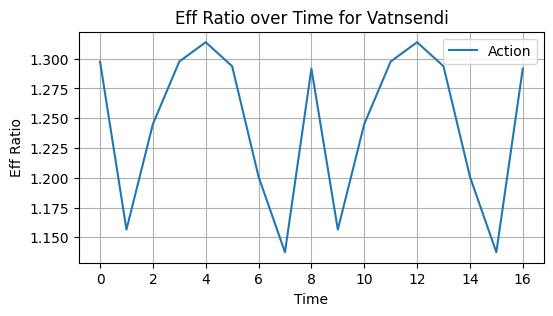

In [32]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffReward'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


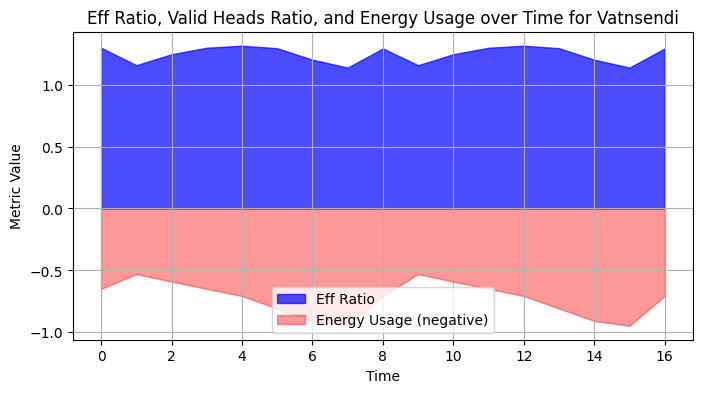

In [33]:
import matplotlib.pyplot as plt

# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffReward'] + agent_results_df['Energy reward']

plt.figure(figsize=(8, 4))

# Plot the stacked area chart for EffRatio and ValidHeadsRatio
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffReward'], label='Eff Ratio', color='blue', alpha=0.7)


# Plot Energy (negative) below x-axis
plt.fill_between(agent_results_df.index, 0, agent_results_df['Energy reward'], label='Energy Usage (negative)', color='red', alpha=0.4)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.title("Eff Ratio, Valid Heads Ratio, and Energy Usage over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


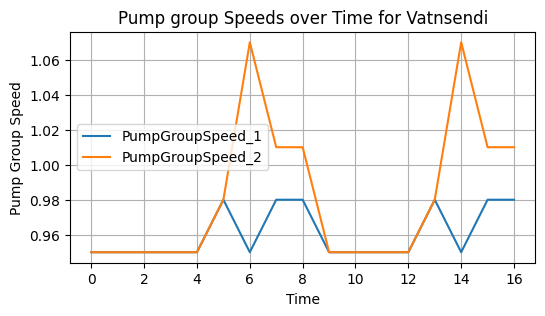

In [34]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_1'], label='PumpGroupSpeed_1')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_2'], label='PumpGroupSpeed_2')
# Plot the 'PumpPower_17' data


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Group Speed")
plt.title("Pump group Speeds over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


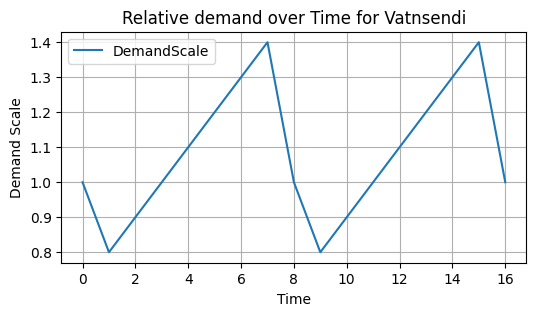

In [35]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['DemandScale'], label='DemandScale')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Demand Scale")
plt.title("Relative demand over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [36]:
plt.figure(figsize=(10, 5))
for i in range(len(agent_results_df)):
    print(f"Step {i}  Group 1: {agent_results_df['PumpGroupSpeed_1'][i]},  Group 2: {agent_results_df['PumpGroupSpeed_2'][i]}, Group 3: {agent_results_df['PumpGroupSpeed_3'][i]}, Demand scale {agent_results_df['DemandScale'][i]}")


Step 0  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 1.0
Step 1  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 0.8
Step 2  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 0.9
Step 3  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 1.0
Step 4  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 1.1
Step 5  Group 1: 0.98,  Group 2: 0.98, Group 3: 0.86, Demand scale 1.2
Step 6  Group 1: 0.95,  Group 2: 1.07, Group 3: 0.92, Demand scale 1.3
Step 7  Group 1: 0.98,  Group 2: 1.01, Group 3: 0.89, Demand scale 1.4
Step 8  Group 1: 0.98,  Group 2: 1.01, Group 3: 0.89, Demand scale 1.0
Step 9  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 0.8
Step 10  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 0.9
Step 11  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 1.0
Step 12  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.86, Demand scale 1.1
Step 13  Group 1: 0.98,  Group 2: 0.98, Group 3: 0.86, Demand scale 1.2
St

<Figure size 1000x500 with 0 Axes>

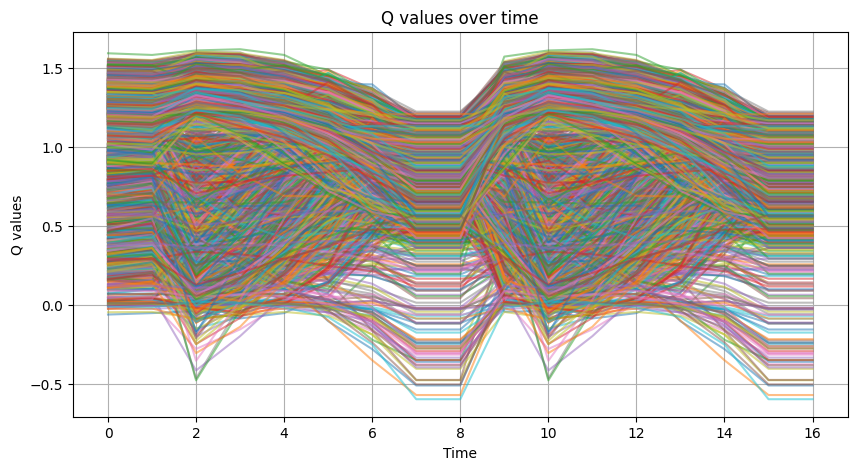

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loop through all Q-value columns
for i in range(2700):
    plt.plot(agent_results_df.index, agent_results_df[f'Q_{i}'], label=f'Q_{i}', alpha=0.5)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)




# Show the plot
plt.show()
